# **Sigmoid Growth Model: Logistic Growth Function**

## **Introduction**
This notebook demonstrates the **sigmoid (logistic) growth model**, a fundamental concept in population dynamics, biological growth, and machine learning. The logistic function models population growth with an initial slow phase, a rapid exponential increase, and a final plateau as the system reaches its carrying capacity.

The mathematical form of the logistic function is:

$$
N(t) = \frac{K}{1 + e^{-r(t - t_0)}}
$$

where:  
- \( K \) is the **carrying capacity** (maximum limit of growth).  
- \( r \) is the **growth rate** (determines how quickly the system grows).  
- \( t_0 \) is the **inflection point** (time at which growth is at its maximum).  

Among the aggregation forming process, we have:
$$
A \xrightarrow{k_1} B \quad (1)
$$

$$
A + B \xrightarrow{k_2} 2B \quad (2)
$$

where:  
- \( A \) represents a **monomeric protein**,  
- \( B \) represents a **polymeric protein aggregate** (past its nucleating size),  
- \( k_1 \) and \( k_2 \) are **rate constants** obtained from curve fitting, corresponding to **nucleation** and **growth**, respectively.  

This reaction model is general and can also apply to other systems, such as nanoparticle formation, where \( A \) could be an Ir(I) precatalyst, and \( B \) the resulting Ir(0)\(_n\) nanoparticle formed under hydrogen.

The overall reaction rate can be expressed as:

$$
- \frac{d[A]}{dt} = \frac{d[B]}{dt} = k_1 [A] + k_2 [A][B]
$$

## **Key Time Scales in Aggregation**
Several important kinetic parameters can be derived from this model:

1. **Time of Maximum Growth Rate**:
  $$
   t_{\max} = \frac{\ln \left( \frac{k_2 [A_0]}{k_1} \right)}{k_1 + k_2 [A_0]}
   $$
   
2. **Maximum Growth Rate**:
   $$
   \left( \frac{d[B]}{dt} \right)_{\max} = \frac{(k_1 + k_2 [A_0])^2}{4k_2}
   $$

3. **Induction Time (Jerk Method)**:
   $$
   t_{\text{induction(jerk)}} = \frac{\ln \left( (2-\sqrt{3}) \frac{k_2 [A_0]}{k_1} \right)}{k_1 + k_2 [A_0]}
   $$

4. **Induction Time (Piecewise Method)**:
   $$
   t_{\text{induction(piecewise)}} = \frac{k_1 + k_2 [A_0]}{(k_1 - k_2 [A_0])^2} \ln \left( \frac{k_2 [A_0]}{k_1} + \frac{2}{k_1 + k_2 [A_0]} \right)
   $$

These equations describe **critical points** in the aggregation process, helping to analyze the kinetics of various systems.

## **Further Reading**
For a detailed discussion on the derivation and applications of these equations, refer to the following publication:  
[ACS Journal of Physical Chemistry C](https://pubs.acs.org/doi/pdf/10.1021/acs.jpcc.6b12021)


## **Objectives**
In this notebook, we will:  
1. **Visualize** the sigmoid growth curve over time.  
2. **Highlight** key growth phases:  
   - **Lag Phase**: Initial slow growth.  
   - **Exponential Growth Phase**: Rapid increase in population.  
   - **Plateau Phase**: Growth slows as it approaches the carrying capacity.  
   - **k1,k2 calculation**:the reaction rate of nucleation and growth
   - **induction points** induction points of piecewise and jerk during nucleation and growth
3. **Annotate** critical points such as the **inflection point** and **maximum population limit**.  
4. **Understand** the behavior of the logistic growth model through mathematical interpretation and visualization.  

This model is widely used in **biology (population modeling), epidemiology (disease spread), machine learning (activation functions), and ecology (species competition).**  

Let's explore the sigmoid growth function and analyze its behavior! 


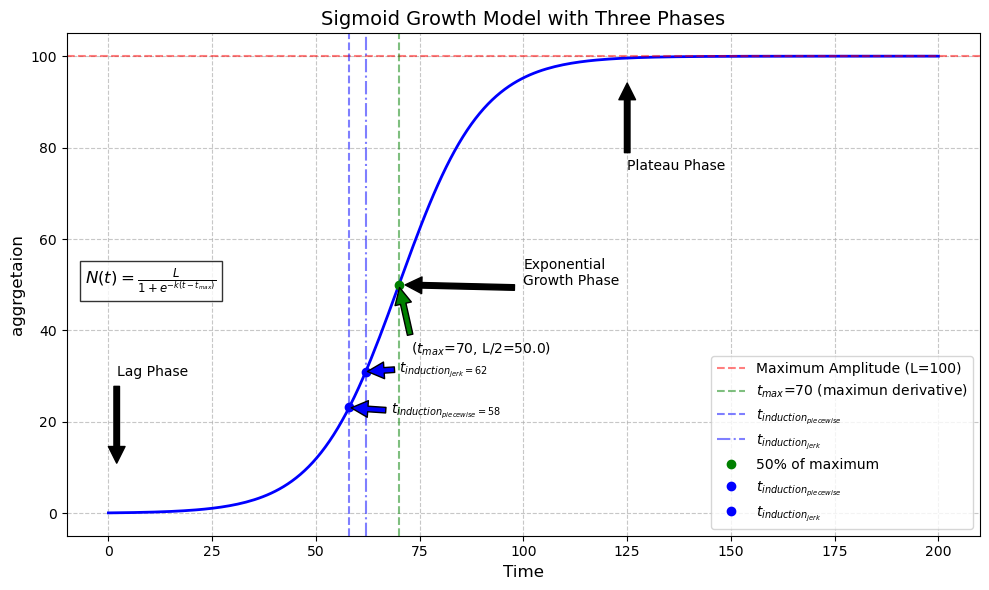

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid_growth(t, K, r, t0):
    """
    Logistic growth function
    K: carrying capacity (plateau)
    r: growth rate
    t0: time of maximum growth (inflection point)
    """
    return K / (1 + np.exp(-r * (t - t0)))

# Create time points
t = np.linspace(0, 200, 200)

# Set parameters
K = 100  # carrying capacity
r = 0.1  # growth rate
t0 = 70  # inflection point

# Calculate growth curve
growth = sigmoid_growth(t, K, r, t0)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(t, growth, 'b-', linewidth=2)

# Add maximum amplitude dashed line
plt.axhline(y=K, color='r', linestyle='--', alpha=0.5, label=f'Maximum Amplitude (L={K})')

# Add vertical line at t0 (inflection point)
plt.axvline(x=t0, color='g', linestyle='--', alpha=0.5, label=f'$t_{{max}}$={t0} (maximun derivative)')
plt.axvline(x=58, color='b', linestyle='--', alpha=0.5, label='$t_{induction_{piecewise}}$')
plt.axvline(x=62, color='b', linestyle='-.', alpha=0.5, label='$t_{induction_{jerk}}$')
# Add point at 50% of maximum
plt.plot(t0, K/2, 'go', label='50% of maximum')
plt.plot(58, sigmoid_growth(58, K, r, t0), 'bo', label='$t_{induction_{piecewise}}$')
plt.plot(62, sigmoid_growth(62, K, r, t0), 'bo', label='$t_{induction_{jerk}}$')
# Add phase annotations
plt.annotate('Lag Phase', xy=(2, 10), xytext=(2, 30),
            arrowprops=dict(facecolor='black', shrink=0.05))
            
plt.annotate('Exponential\nGrowth Phase', xy=(70, 50), xytext=(100, 50),
            arrowprops=dict(facecolor='black', shrink=0.05))

# plt.annotate(f'$t_induction{{piecewise}}$ ≈ 58, k1 << k2', xy=(58, 50), xytext=(12, 42),
#             arrowprops=dict(facecolor='green', shrink=0.1))
            
plt.annotate('Plateau Phase', xy=(125, 95), xytext=(125, 75),
            arrowprops=dict(facecolor='black', shrink=0.05))

# Add annotation for 50% point
plt.annotate(f'($t_{{max}}$={t0}, L/2={K/2})', 
            xy=(t0, K/2), xytext=(t0+3, K/2-15),
            arrowprops=dict(facecolor='green', shrink=0.05))

plt.annotate('$t_{induction_{piecewise}=58}$', 
            xy=(58, 23.1), xytext=(68, 22),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.annotate('$t_{induction_{jerk}=62}$', 
            xy=(62, 31), xytext=(70, 31),
            arrowprops=dict(facecolor='blue', shrink=0.05))

# Customize the plot
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Time', fontsize=12)
plt.ylabel('aggrgetaion', fontsize=12)
plt.title('Sigmoid Growth Model with Three Phases', fontsize=14)

# Add mathematical expression
plt.text(0.02, 0.5, r'$N(t) = \frac{L}{1 + e^{-k(t-t_{max})}}$', 
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Add legend
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [7]:
#this is the code sample script for aggragation data od small moleculr with peptide aggregation model fitting 

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd

In [8]:
data = {
    "Time (h)": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 20, 22],
    "10 eq.": [0.00, 0.00, 0.00, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01, 0.02, 0.02, 0.02, 0.01, 0.01],
    "Error (10 eq.)": ["-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-"],
    "20 eq.": [0.00, 0.03, 0.04, 0.05, 0.05, 0.06, 0.06, 0.07, 0.08, 0.09, 0.11, 0.12, 0.14, 0.18, 0.24, 0.27, 0.31],
    "Error (20 eq.)": [0.00, 0.013, 0.019, 0.011, 0.012, 0.015, 0.014, 0.018, 0.016, 0.016, 0.027, 0.022, 0.030, 0.037, 0.055, 0.021, 0.041],
    "30 eq.": [0.00, 0.02, 0.04, 0.05, 0.06, 0.06, 0.07, 0.08, 0.10, 0.12, 0.15, 0.19, 0.28, 0.43, 0.48, 0.50, 0.52],
    "Error (30 eq.)": [0.00, 0.003, 0.009, 0.001, 0.008, 0.005, 0.007, 0.008, 0.009, 0.001, 0.010, 0.022, 0.037, 0.004, 0.028, 0.023, 0.021],
    "Time (h)": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 20, 22],
    "40 eq.": [0.00, 0.01, 0.03, 0.05, 0.06, 0.10, 0.13, 0.17, 0.24, 0.31, 0.39, 0.45, 0.49, 0.54, 0.56, 0.58, 0.59],
    "Error (40 eq.)": [0.000, 0.000, 0.012, 0.007, 0.005, 0.005, 0.010, 0.004, 0.014, 0.013, 0.022, 0.014, 0.008, 0.008, 0.025, 0.032, 0.023],
    "60 eq.": [0.00, 0.05, 0.08, 0.11, 0.14, 0.19, 0.23, 0.32, 0.41, 0.48, 0.55, 0.60, 0.62, 0.64, 0.65, 0.66, 0.66],
    "Error (60 eq.)": [0.000, 0.014, 0.017, 0.020, 0.018, 0.021, 0.013, 0.009, 0.039, 0.043, 0.033, 0.035, 0.029, 0.017, 0.014, 0.002, 0.008],
    "100 eq.": [0.00, 0.08, 0.19, 0.30, 0.38, 0.46, 0.51, 0.56, 0.61, 0.63, 0.65, 0.67, 0.68, 0.68, 0.69, 0.70, 0.71],
    "Error (100 eq.)": [0.001, 0.000, 0.005, 0.006, 0.003, 0.004, 0.005, 0.010, 0.004, 0.005, 0.004, 0.003, 0.005, 0.007, 0.005, 0.001, 0.004]
    
}

# Convert to a pandas DataFrame
df = pd.DataFrame(data)

In [9]:
df

,Time (h),10 eq.,Error (10 eq.),20 eq.,Error (20 eq.),30 eq.,Error (30 eq.),40 eq.,Error (40 eq.),60 eq.,Error (60 eq.),100 eq.,Error (100 eq.)
0,0,0.00,-,0.00,0.000,0.00,0.000,0.00,0.000,0.00,0.000,0.00,0.001
1,1,0.00,-,0.03,0.013,0.02,0.003,0.01,0.000,0.05,0.014,0.08,0.000
2,2,0.00,-,0.04,0.019,0.04,0.009,0.03,0.012,0.08,0.017,0.19,0.005
3,3,0.01,-,0.05,0.011,0.05,0.001,0.05,0.007,0.11,0.020,0.30,0.006
4,4,0.01,-,0.05,0.012,0.06,0.008,0.06,0.005,0.14,0.018,0.38,0.003
5,5,0.01,-,0.06,0.015,0.06,0.005,0.10,0.005,0.19,0.021,0.46,0.004
6,6,0.01,-,0.06,0.014,0.07,0.007,0.13,0.010,0.23,0.013,0.51,0.005
7,7,0.01,-,0.07,0.018,0.08,0.008,0.17,0.004,0.32,0.009,0.56,0.010
8,8,0.01,-,0.08,0.016,0.10,0.009,0.24,0.014,0.41,0.039,0.61,0.004
9,9,0.01,-,0.09,0.016,0.12,0.001,0.31,0.013,0.48,0.043,0.63,0.005


In [11]:
def prepare_data_for_fitting(df):
    # Get time data
    time = df['Time (h)'].unique()
    
    # Dictionary to store processed data
    processed_data = {}
    
    # Define the concentrations to process
    concentrations = {
        '10 eq.': '10 eq.',
        '20 eq.': '20 eq.',
        '30 eq.': '30 eq.',
        '40 eq.': '40 eq.',
        '60 eq.': '60 eq.',
        '100 eq.': '100 eq.'
    }
    
    # Process each concentration
    for label, column in concentrations.items():
        if column in df.columns:
            mole_fraction = df[column].values
            error_column = f"Error ({label.split()[0]} eq.)"
            errors = df[error_column].values if error_column in df.columns else None
            
            # Convert errors from string to float if necessary
            if errors is not None and isinstance(errors[0], str):
                errors = np.array([0.0 if x == '-' else float(x) for x in errors])
            
            processed_data[label] = {
                'time': time,
                'mole_fraction': mole_fraction,
                'errors': errors
            }
    
    return processed_data

processed_data = prepare_data_for_fitting(df)

In [14]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

def sigmoid(x, L, k, x0, b):
    """
    Generalized logistic sigmoid function
    L: maximum value
    k: steepness of the curve
    x0: x-value of the sigmoid's midpoint
    b: base level (minimum value)
    """
    return L / (1 + np.exp(-k * (x - x0))) + b

def fit_constrained_sigmoid(time, mole_fraction, label, errors=None):
    """
    Fit data to a sigmoid curve with constraints on parameters
    """
    # Initial parameter guesses
    max_y = np.max(mole_fraction)
    min_y = np.min(mole_fraction)
    mid_x = np.median(time)
    
    # set base level bounds
    bounds = (
        [0, 0, 0, -0.05],  # Lower bounds
        [np.inf, np.inf, np.inf, 0.05]  # Upper bounds
    )
    
    # Initial guesses for parameters [L, k, x0, b]
    p0 = [1.0, 0.5, mid_x, 0.0]
    
    # Fit the sigmoid function with bounds
    popt, pcov = curve_fit(sigmoid, time, mole_fraction, 
                           p0=p0, 
                           bounds=bounds,
                           maxfev=10000)
    
    # Generate points for smooth curve
    time_fine = np.linspace(min(time), max(time), 200)
    fitted_curve = sigmoid(time_fine, *popt)
    fitted_points = sigmoid(time, *popt)
    
    # Calculate R-squared
    r_squared = r2_score(mole_fraction, fitted_points)
    
    # Plot data points and fitted curve
    plt.scatter(time, mole_fraction, label=f'{label} Data', alpha=0.7, s=20)
    
    # Plot error bars if available
    if errors is not None:
        plt.errorbar(time, mole_fraction, yerr=errors, fmt='none', alpha=0.3, capsize=3)
    
    plt.plot(time_fine, fitted_curve, '--', 
             label=f'{label}\nR² = {r_squared:.4f}')
    
    # Create parameter dictionary
    params = {
        'L': popt[0],     # maximum value
        'k': popt[1],     # steepness
        'x0': popt[2],    # midpoint
        'b': popt[3],     # base level
        'R2': r_squared
    }
    
    return params

def plot_all_sigmoids(processed_data, figsize=(12, 8)):
    """
    Plot sigmoid fits for all datasets
    """
    plt.figure(figsize=figsize)
    
    # Store results for all datasets
    results = {}
    
    for label, data in processed_data.items():
        # Perform sigmoid fit
        params = fit_constrained_sigmoid(
            data['time'],
            data['mole_fraction'],
            label,
            errors=data['errors'] if 'errors' in data else None
        )
        results[label] = params
    
    plt.xlabel('Time (h)')
    plt.ylabel('Mole Fraction Lost')
    plt.title('Constrained Sigmoidal Fits for Different Concentrations')
    plt.legend()
    plt.ylim(0,1)
    plt.xlim(0,24)
    plt.grid(True)
    
    return results

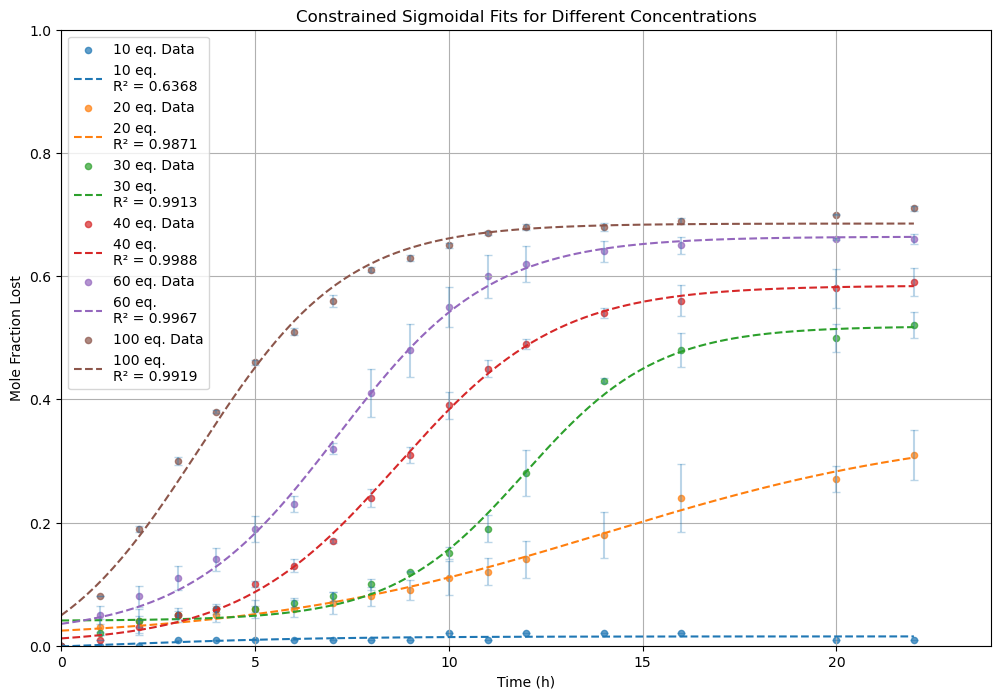

In [15]:
result = plot_all_sigmoids(processed_data)
plt.show()

In [18]:
import pandas as pd
import numpy as np

def create_parameter_table(results):
    """
    Create a formatted table of sigmoid parameters from fitting results
    
    Parameters:
    results: dict of fitting parameters for each concentration
    
    Returns:
    pd.DataFrame: formatted table of parameters
    """
    # Create dictionary to store parameters
    table_data = {
        'Concentration': [],
        'Maximum (L)': [],
        'Steepness (k)': [],
        'Midpoint (x₀)': [],
        'Base Level (b)': [],
        'R²': []
    }
    
    # Fill in the data
    for label, params in results.items():
        table_data['Concentration'].append(label)
        table_data['Maximum (L)'].append(params['L'])
        table_data['Steepness (k)'].append(params['k'])
        table_data['Midpoint (x₀)'].append(params['x0'])
        table_data['Base Level (b)'].append(params['b'])
        table_data['R²'].append(params['R2'])
    
    # Create DataFrame
    df = pd.DataFrame(table_data)
    
    # Format the numeric columns
    df['Maximum (L)'] = df['Maximum (L)'].map('{:.2f}'.format)
    df['Steepness (k)'] = df['Steepness (k)'].map('{:.2f}'.format)
    df['Midpoint (x₀)'] = df['Midpoint (x₀)'].map('{:.2f}'.format)
    df['Base Level (b)'] = df['Base Level (b)'].map('{:.2f}'.format)
    df['R²'] = df['R²'].map('{:.4f}'.format)
    
    # Set concentration as index
    df = df.set_index('Concentration')
    
    return df

# Example usage:
table = create_parameter_table(result)
display(table)

,Maximum (L),Steepness (k),Midpoint (x₀),Base Level (b),R²
Concentration,,,,,
10 eq.,0.03,0.36,1.33,-0.01,0.6368
20 eq.,0.35,0.22,14.03,0.01,0.9871
30 eq.,0.48,0.58,11.95,0.04,0.9913
40 eq.,0.58,0.48,8.68,0.00,0.9988
60 eq.,0.65,0.50,7.13,0.02,0.9967
100 eq.,0.74,0.52,3.54,-0.05,0.9919


In [24]:
#calculate derivatives and max time to get k1 and k2
import numpy as np
from scipy.optimize import minimize

def analyze_sigmoid_derivative(params):
    """
    Calculate derivative maximum and corresponding time point for sigmoid fit
    Extract k1 and k2 from sigmoid parameters
    
    params: dictionary containing sigmoid parameters (L, k, x0, b)
    returns: dictionary with derivative analysis and kinetic parameters
    """
    L = params['L']
    k = params['k']
    x0 = params['x0']
    b = params['b']
    
    def sigmoid_derivative(x):
        """Analytical derivative of the sigmoid function"""
        exp_term = np.exp(-k * (x - x0))
        return (L * k * exp_term) / ((1 + exp_term) ** 2)
    
    # The maximum of the derivative occurs at x0 (inflection point)
    max_derivative = sigmoid_derivative(x0)
    
    # Calculate k1 and k2 using the relationships:
    # x0 = ln(k2/k1)/(k1+k2)
    # max_derivative = (k1+k2)^2/(4k2)
    
    # From max_derivative equation:
    # (k1+k2)^2 = 4k2 * max_derivative
    
    # Define error function to minimize
    def error_function(params):
        k1, k2 = params
        # Calculate expected x0 and max_derivative
        expected_x0 = np.log(k2/k1)/(k1+k2)
        expected_max_der = (k1+k2)**2/(4*k2)
        
        # Calculate error as sum of squared differences
        x0_error = (expected_x0 - x0)**2
        der_error = (expected_max_der - max_derivative)**2
        
        return x0_error + der_error
    
    # Initial guess for k1 and k2
    initial_guess = [0.1, 0.1]
    
    # Constraint: k1, k2 > 0
    bounds = [(1e-10, None), (1e-10, None)]
    
    # Minimize error function
    result = minimize(error_function, initial_guess, bounds=bounds, method='L-BFGS-B')
    k1, k2 = result.x
    
    return {
        'max_derivative': max_derivative,
        'max_derivative_time': x0,
        'k1': k1,
        'k2': k2,
        'k1_k2_ratio': k1/k2
    }

def analyze_all_sigmoids(results):
    """
    Analyze derivatives and extract kinetic parameters for all datasets
    
    results: dictionary of sigmoid fit parameters for each dataset
    returns: dictionary of analysis results for each dataset
    """
    analysis_results = {}
    
    for label, params in results.items():
        analysis = analyze_sigmoid_derivative(params)
        analysis_results[label] = analysis
    
    return analysis_results

In [25]:
def display_results_table(analysis_results):
    """
    Display analysis results in a nicely formatted table
    
    Parameters:
    analysis_results: dictionary containing analysis results for each dataset
    """
    # Import pandas for nice table formatting
    import pandas as pd
    
    # Create lists to store the data
    data = {
        'Dataset': [],
        'Max Derivative': [],
        'Time at Max (h)': [],
        'k₁ (h⁻¹)': [],
        'k₂ (h⁻¹)': [],
        'k₁/k₂': []
    }
    
    # Fill the data dictionary
    for label, results in analysis_results.items():
        data['Dataset'].append(label)
        data['Max Derivative'].append(results['max_derivative'])
        data['Time at Max (h)'].append(results['max_derivative_time'])
        data['k₁ (h⁻¹)'].append(results['k1'])
        data['k₂ (h⁻¹)'].append(results['k2'])
        data['k₁/k₂'].append(results['k1_k2_ratio'])
    
    # Create DataFrame
    df = pd.DataFrame(data)
    
    # Set display options for better formatting
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    pd.set_option('display.max_colwidth', None)

    
    return df  # Return DataFrame for potential further use



In [26]:
analysis_results = analyze_all_sigmoids(result)
display_results_table(analysis_results)

,Dataset,Max Derivative,Time at Max (h),k₁ (h⁻¹),k₂ (h⁻¹),k₁/k₂
0,10 eq.,0.002385,1.328153,0.115307,0.167947,0.686571
1,20 eq.,0.019101,14.026455,0.017209,0.036608,0.470079
2,30 eq.,0.069729,11.950504,0.010372,0.258825,0.040074
3,40 eq.,0.070118,8.683840,0.025344,0.227256,0.111522
4,60 eq.,0.081461,7.127862,0.032656,0.256509,0.127310
5,100 eq.,0.096320,3.538199,0.075914,0.205388,0.369611


In [28]:
def get_t_para(k1,k2):
    t_jerk = np.log((2-3**0.5)*k2*2/k1)/(k1+k2*2)
    t_pairwise = (k1+k2*2)/(k1-k2*2)**2 * np.log(k2*2/k1) + 2/(k1-k2*2)
    return t_jerk,t_pairwise

def analyze_time_parameters(analysis_results):
    """
    Extract time parameters for all datasets from analysis results
    """
    time_params = {}
    
    for label, results in analysis_results.items():
        k1 = results['k1']
        k2 = results['k2']
        t_jerk, t_pairwise = get_t_para(k1, k2)
        
        time_params[label] = {
            't_jerk': t_jerk,
            't_pairwise': t_pairwise
        }
        
        print(f"\nTime parameters for {label}:")
        print(f"t_piecewise: {t_pairwise:.4f}")
        print(f"t_jerk: {t_jerk:.4f}")
        
    
    return time_params

In [29]:
time_params = analyze_time_parameters(analysis_results)


Time parameters for 10 eq.:
t_piecewise: 0.8477
t_jerk: -0.5491

Time parameters for 20 eq.:
t_piecewise: 6.0316
t_jerk: 1.4492

Time parameters for 30 eq.:
t_piecewise: 4.0808
t_jerk: 4.9112

Time parameters for 40 eq.:
t_piecewise: 2.8605
t_jerk: 3.2712

Time parameters for 60 eq.:
t_piecewise: 2.3498
t_jerk: 2.6340

Time parameters for 100 eq.:
t_piecewise: 1.3558
t_jerk: 0.7633
